In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [2]:
telco_base_data = pd.read_csv('Churn_Modelling.csv')

In [3]:
telco_base_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
teleco_new = telco_base_data[['Geography','Gender','Exited']]

In [5]:
teleco_new.head()

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


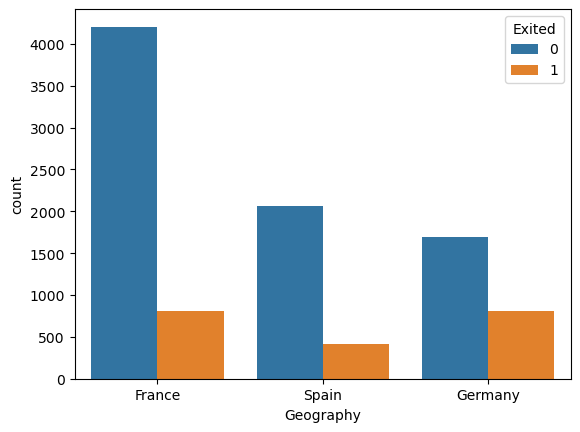

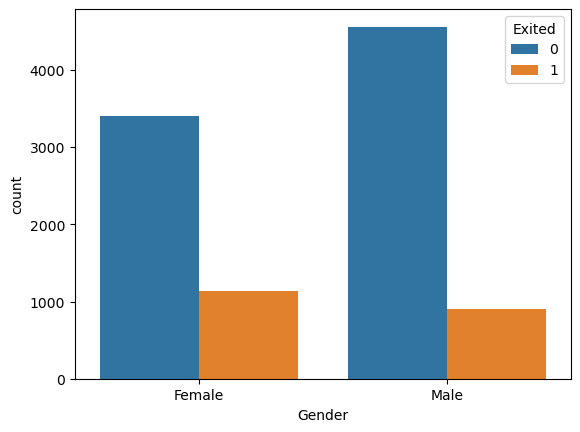

In [6]:
for i,predictor in enumerate(teleco_new.drop(columns = ['Exited'])):
    plt.figure()
    sns.countplot(data = teleco_new, x=predictor, hue = 'Exited')
plt.show()

#Geography-wise:People in germany are churners(denoted by 1) churners:The person who leaves the company
#Gender-wise:Females are the more churners when compared to mens)

In [7]:
teleco_new['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
len(teleco_new)

10000

In [9]:
teleco_new['Exited'].value_counts()/len(teleco_new)*100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

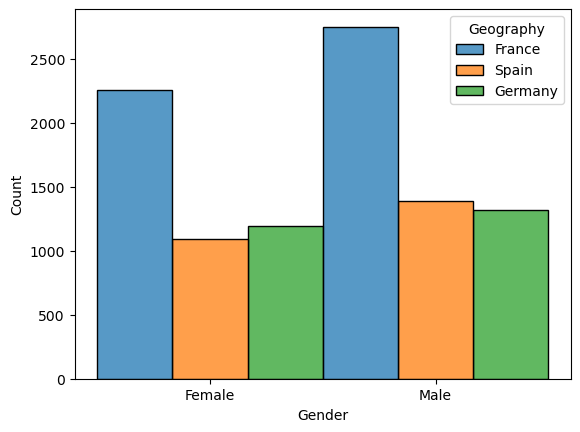

In [10]:
plt.figure()
sns.histplot(data = teleco_new,x = 'Gender',hue='Geography',stat ='count',multiple='dodge')
plt.show()

In [11]:
teleco_new_1 = teleco_new.loc[teleco_new['Exited']==1]

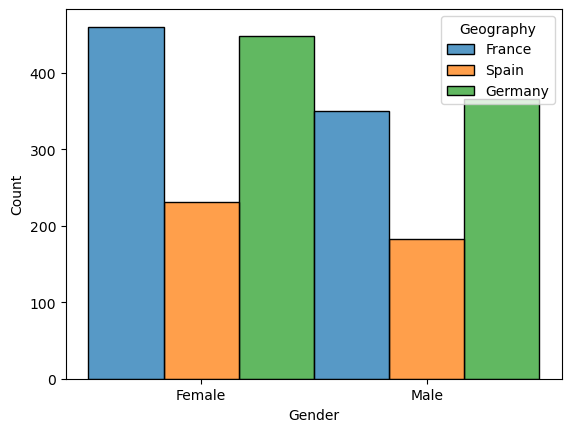

In [12]:
plt.figure()
sns.histplot(data = teleco_new_1,x = 'Gender',hue='Geography',stat ='count',multiple='dodge')
plt.show()

In [13]:
teleco_neww = telco_base_data.select_dtypes(include=['number']).corr()


In [14]:
teleco_neww

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


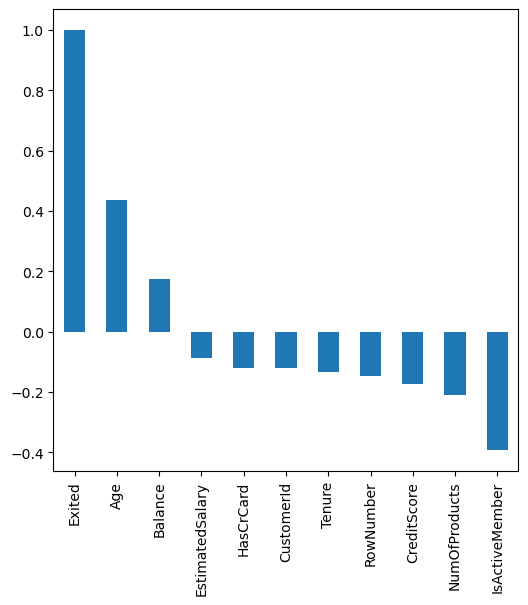

In [15]:
plt.figure(figsize = (6,6))
teleco_neww.corr()['Exited'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

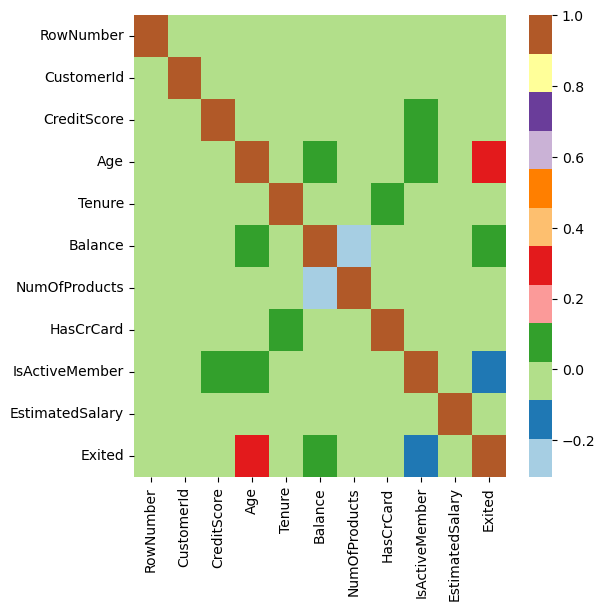

In [16]:
plt.figure(figsize=(6,6))
sns.heatmap(teleco_neww,cmap='Paired')
plt.show()

In [17]:
telco_base_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
telco_base_data['Age'].value_counts().sort_index(ascending = True)

Age
18    22
19    27
20    40
21    53
22    84
      ..
83     1
84     2
85     1
88     1
92     2
Name: count, Length: 70, dtype: int64

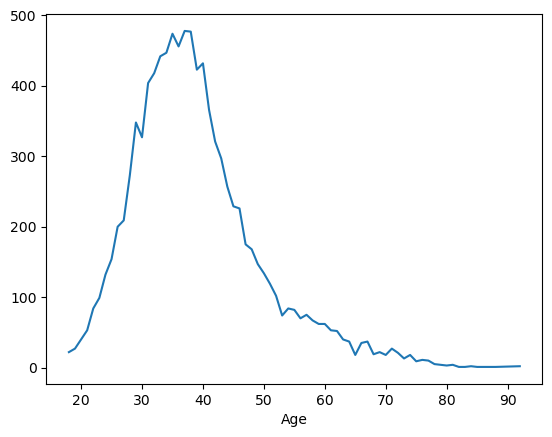

In [19]:
telco_base_data['Age'].value_counts().sort_index(ascending = True).plot()
plt.show()

In [20]:
teleco_exit = telco_base_data.loc[telco_base_data['Exited'] == 1]

In [21]:
teleco_exit

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [22]:
teleco_exit['Age'].value_counts().sort_index(ascending = True)

Age
18     2
19     1
20     2
21     3
22    12
23     6
24    14
25     6
26    14
27    13
28    23
29    28
30    24
31    33
32    32
33    44
34    33
35    57
36    53
37    62
38    63
39    72
40    89
41    69
42    77
43    88
44    73
45    87
46    91
47    77
48    80
49    75
50    71
51    66
52    64
53    40
54    51
55    48
56    50
57    38
58    29
59    30
60    32
61    21
62    21
63    18
64    12
65     8
66     7
67     5
68     6
69     2
70     4
71     7
72     1
73     1
74     1
84     1
Name: count, dtype: int64

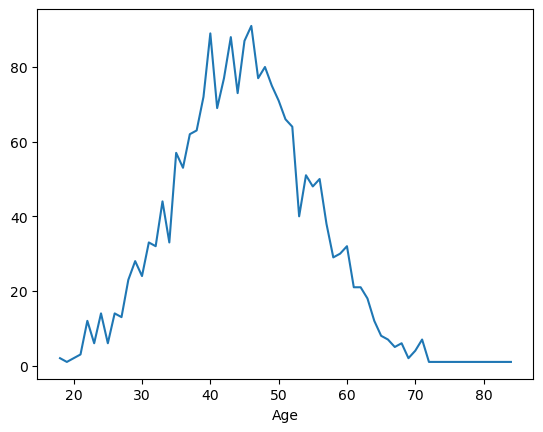

In [23]:
teleco_exit['Age'].value_counts().sort_index(ascending = True).plot()
plt.show()

C:\Users\91949\AppData\Local\Temp\ipykernel_3392\3376625237.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(telco_base_data.Age[(telco_base_data['Exited']==0)], color = "Green",shade = True)
C:\Users\91949\AppData\Local\Temp\ipykernel_3392\3376625237.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(telco_base_data.Age[(telco_base_data['Exited']==1)], color = "Red",shade = True)


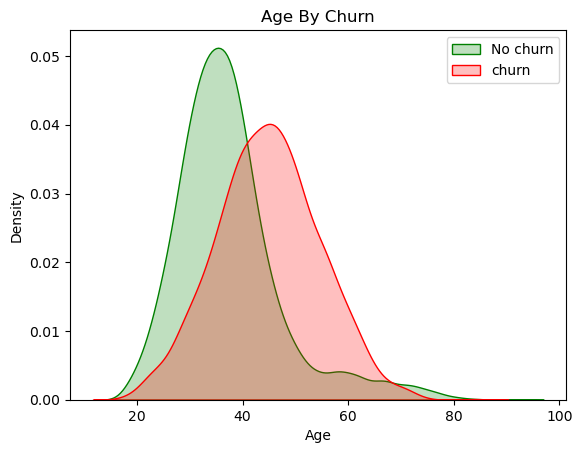

In [24]:
tot = sns.kdeplot(telco_base_data.Age[(telco_base_data['Exited']==0)], color = "Green",shade = True)
tot = sns.kdeplot(telco_base_data.Age[(telco_base_data['Exited']==1)], color = "Red",shade = True)
tot.legend(["No churn","churn"],loc= "upper right")
tot.set_xlabel('Age')
tot.set_ylabel('Density')
tot.set_title('Age By Churn')
plt.show()

In [25]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [26]:
telco_base_data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [27]:
telco_base_data.Gender.mode()

0    Male
Name: Gender, dtype: object

In [28]:
le = preprocessing.LabelEncoder()
telco_base_data['Gender_values'] = le.fit_transform(telco_base_data.Gender.values)

In [29]:
telco_base_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_values
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [30]:
telco_base_data.drop(columns = ['Surname','RowNumber','CustomerId'],axis = 1,inplace = True)

In [31]:
telco_base_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_values
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [32]:
df_dummies = pd.get_dummies(telco_base_data,dtype=int)
df_dummies.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_values,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1,1,0


In [33]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [34]:
from category_encoders import TargetEncoder

In [35]:
encoder = TargetEncoder()

In [36]:
df = pd.read_csv('Churn_Modelling.csv')

In [37]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df.drop(columns=['Surname', 'CustomerId', 'RowNumber'],axis = 1, inplace=True)

In [39]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [41]:
encoder = TargetEncoder()
df['Gender Encoder'] = encoder.fit_transform(df['Gender'],df['Exited'])

In [42]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender Encoder
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.250715
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.250715
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.250715
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.250715
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.250715


In [45]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Gender Encoder'],
      dtype='object')

In [47]:
df.rename(columns={'Exited':'churn'},inplace=True)

In [48]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn,Gender Encoder
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.250715
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.250715
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.250715
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.250715
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.250715


In [50]:
# Input features (your customer data)
X = df.drop("churn", axis=1)

# Target variable
y = df["churn"]


In [51]:
X = pd.get_dummies(X, drop_first=True)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)


In [55]:
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [57]:
y_pred = model.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.811
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [59]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.811


In [60]:
print(type(y_pred))
print(len(y_pred))


<class 'numpy.ndarray'>
2000
